In [27]:
#%load_ext autoreload
#%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


# basic functionalities
import re
import os
import sys
import datetime
import itertools
import math 


# data transforamtion and manipulation
import pandas as pd
import pandas_datareader.data as web
import numpy as np
# prevent crazy long pandas prints
pd.options.display.max_columns = 16
pd.options.display.max_rows = 16
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(precision=5, suppress=True)


# remove warnings
import warnings
warnings.filterwarnings('ignore')


# plotting and plot stying
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
plt.style.use('seaborn')
#sns.set_style("whitegrid", {'axes.grid' : False})
#set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 80
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['text.usetex'] = False
#plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = b"\usepackage{subdepth}, \usepackage{type1cm}"


# deep learning
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model 
from keras.layers import LSTM

# sklearn functionalities
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


# jupyter wdgets
from ipywidgets import interactive, widgets, RadioButtons, ToggleButtons, Select, FloatSlider, FloatProgress
from IPython.display import set_matplotlib_formats, Image

# Artificial Neural Networks for Time Series Forecasting

<strong>Artificial neural networks (ANNs)</strong> are computing systems inspired by the biological neural networks that constitute bilological brains. Such systems learn (progressively improve performance) to do tasks by considering examples, generally without task-specific programming (if-then clauses).

An ANN is based on a collection of connected units called <strong>Perceptrons</strong>, a linear classifier analogous to neurons in a biological brain. Each connection (synapse) between neurons can transmit a signal to another neuron. The receiving (postsynaptic) neuron can process the signal(s) and then signal downstream neurons connected to it.

Neurons may have state, generally represented by real numbers, typically between 0 and 1. Neurons and synapses may also have a weight that varies as learning proceeds, which can increase or decrease the strength of the signal that it sends downstream. Further, they may have a threshold such that only if the aggregate signal is below (or above) that level is the downstream signal sent. - <a href="https://en.wikipedia.org/wiki/Artificial_neural_network">Wikipedia</a>




https://www.youtube.com/watch?v=MVyauNNinC0

## Neural Network Basics

An ANN takes an input matrix $X$ applies a weights $W$ on the way through the network from input layer to the output layer to estimate some output $y$. This estimation process is knwon as <strong>Forward Propagation</strong>. The estimate $\hat{y}$ is compared to the actual observation $y$ using a <strong>Cost Function</strong> $E$ which computes the sum of squared errors. 

If the cost function is minimized for all weight parameters the neural network learns the most effective representation of the data $\hat{y}$ that leads the desired result $y$. That is, in every iteration the weights in the network are being adjusted in accordance to their contribution to the total error in the estimation. This process is called <strong> Back Propagation</strong>. Since $W$ is a vector


## A Supervised Learning Task

Time series prediction problems are inherently different from supervised learning problems in that obervastions posses a timely ordering and no observeable input. Thus, the time series prediction problem has to be converted into a regression problem.

A supervised learing problem requires data of the form $(y, X)$ where $y$ is the observeable output and $X$ is a matrix of input data which is assumed to cause the observed output. Since the output variable $y$ is assumed to be continuous this problem is called a supervised regression problem.

In [3]:
np.random.seed(7)

In [4]:
df = pd.read_csv('./data/passengers.csv', sep=';', parse_dates=True, index_col=0)
data = df.values

# using keras often requires the data type float32
data = data.astype('float32')

# slice the data
train = data[0:120, :]
test = data[120:, :]

print(len(train), len(test))

120 24


The <code>create_data</code> function will be used to transform the time series into a regression problem. The <code>lags</code> argument takes an integer which corresponds the the number of previous time steps to use as input variables to predict the next time period. The default value is one but will be changed in a next iteration.

With the default setting a data set will be created where $X$ is the number of passengers at time $t$ and $y$ is the number of passengers at time $t+1$.

In [5]:
def prepare_data(data, lags=1):
    """
    Create lagged data from an input time series
    """
    X, y = [], []
    for row in range(len(data) - lags - 1):
        a = data[row:(row + lags), 0]
        X.append(a)
        y.append(data[row + lags, 0])
    return np.array(X), np.array(y)

In [6]:
lags = 1
X_train, y_train = prepare_data(train, lags)
X_test, y_test = prepare_data(test, lags)
y_true = y_test     # due to naming convention

In [7]:
X_train

array([[ 112.],
       [ 118.],
       [ 132.],
       [ 129.],
       [ 121.],
       [ 135.],
       [ 148.],
       [ 148.],
       [ 136.],
       [ 119.],
       [ 104.],
       [ 118.],
       [ 115.],
       [ 126.],
       [ 141.],
       [ 135.],
       [ 125.],
       [ 149.],
       [ 170.],
       [ 170.],
       [ 158.],
       [ 133.],
       [ 114.],
       [ 140.],
       [ 145.],
       [ 150.],
       [ 178.],
       [ 163.],
       [ 172.],
       [ 178.],
       [ 199.],
       [ 199.],
       [ 184.],
       [ 162.],
       [ 146.],
       [ 166.],
       [ 171.],
       [ 180.],
       [ 193.],
       [ 181.],
       [ 183.],
       [ 218.],
       [ 230.],
       [ 242.],
       [ 209.],
       [ 191.],
       [ 172.],
       [ 194.],
       [ 196.],
       [ 196.],
       [ 236.],
       [ 235.],
       [ 229.],
       [ 243.],
       [ 264.],
       [ 272.],
       [ 237.],
       [ 211.],
       [ 180.],
       [ 201.],
       [ 204.],
       [ 188.],
       [

In [8]:
y_train

array([ 118.,  132.,  129.,  121.,  135.,  148.,  148.,  136.,  119.,
        104.,  118.,  115.,  126.,  141.,  135.,  125.,  149.,  170.,
        170.,  158.,  133.,  114.,  140.,  145.,  150.,  178.,  163.,
        172.,  178.,  199.,  199.,  184.,  162.,  146.,  166.,  171.,
        180.,  193.,  181.,  183.,  218.,  230.,  242.,  209.,  191.,
        172.,  194.,  196.,  196.,  236.,  235.,  229.,  243.,  264.,
        272.,  237.,  211.,  180.,  201.,  204.,  188.,  235.,  227.,
        234.,  264.,  302.,  293.,  259.,  229.,  203.,  229.,  242.,
        233.,  267.,  269.,  270.,  315.,  364.,  347.,  312.,  274.,
        237.,  278.,  284.,  277.,  317.,  313.,  318.,  374.,  413.,
        405.,  355.,  306.,  271.,  306.,  315.,  301.,  356.,  348.,
        355.,  422.,  465.,  467.,  404.,  347.,  305.,  336.,  340.,
        318.,  362.,  348.,  363.,  435.,  491.,  505.,  404.,  359.,  310.], dtype=float32)

The data set now has the following form
<pre>
X       y
112     118
118     132
132     129
129     121
121     135
</pre>
That is, the function has successfully shifted the data for one time step and saved this new shifted series to an array.

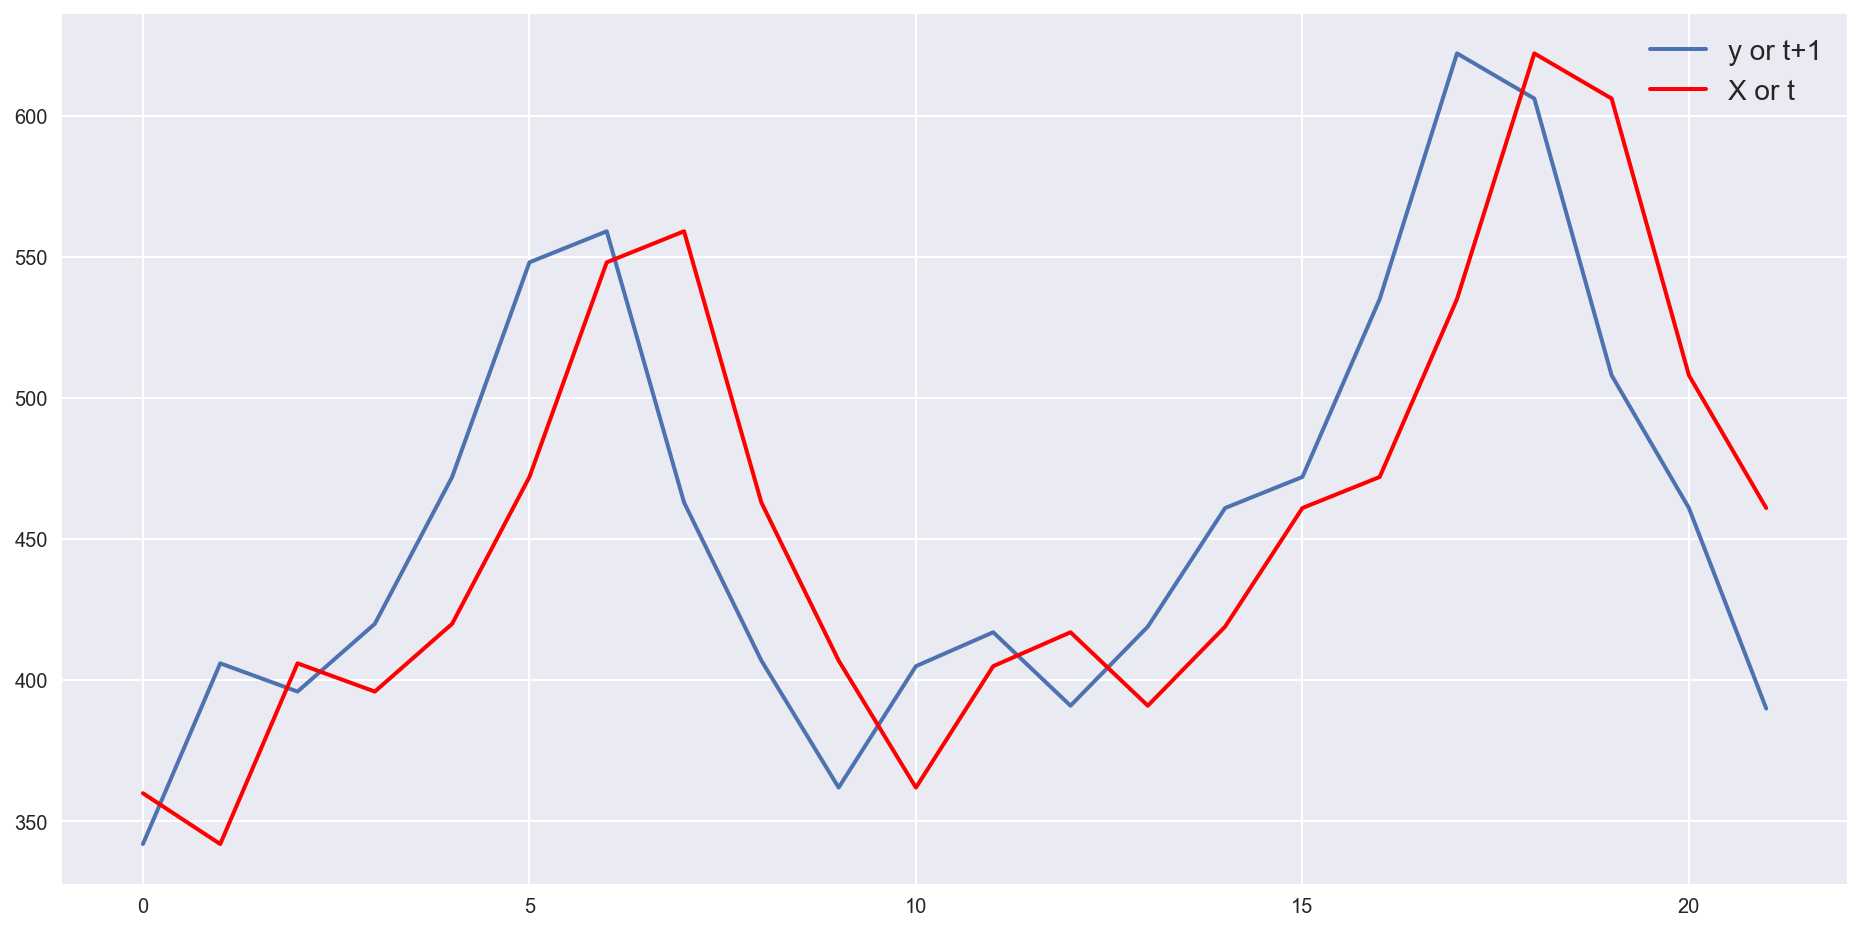

In [9]:
# plot the created data
plt.plot(y_test, label='y or t+1')
plt.plot(X_test, label='X or t', color='red')
plt.legend(loc='best')
plt.show()

## Multilayer Perceptron Network

As previously, the data is sliced up into a <code>train</code> and <code>test</code> set to evaluate the performance of a two-year-ahead forecast.

The first simple network will have one input (size of the <code>lags</code> variable), one hidden layer with 8 neurons and an output layer. The model is fitted using the MSE criterion and rectified linear units as activation function

In [10]:
# create and fit Multilayer Perceptron model
mdl = Sequential()
mdl.add(Dense(8, input_dim=lags, activation='relu'))
mdl.add(Dense(1))
mdl.compile(loss='mean_squared_error', optimizer='adam')
mdl.fit(X_train, y_train, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
0s - loss: 64494.7616
Epoch 2/200
0s - loss: 54719.4878
Epoch 3/200
0s - loss: 44665.2754
Epoch 4/200
0s - loss: 34508.7933
Epoch 5/200
0s - loss: 24925.3127
Epoch 6/200
0s - loss: 16667.4226
Epoch 7/200
0s - loss: 10226.7617
Epoch 8/200
0s - loss: 5860.3666
Epoch 9/200
0s - loss: 3197.9885
Epoch 10/200
0s - loss: 1827.0712
Epoch 11/200
0s - loss: 1203.7587
Epoch 12/200
0s - loss: 950.1223
Epoch 13/200
0s - loss: 861.7211
Epoch 14/200
0s - loss: 840.3110
Epoch 15/200
0s - loss: 829.6042
Epoch 16/200
0s - loss: 829.4222
Epoch 17/200
0s - loss: 829.8610
Epoch 18/200
0s - loss: 825.5633
Epoch 19/200
0s - loss: 826.1765
Epoch 20/200
0s - loss: 827.8865
Epoch 21/200
0s - loss: 831.7815
Epoch 22/200
0s - loss: 827.2398
Epoch 23/200
0s - loss: 826.7124
Epoch 24/200
0s - loss: 824.1507
Epoch 25/200
0s - loss: 825.6401
Epoch 26/200
0s - loss: 831.8967
Epoch 27/200
0s - loss: 824.5793
Epoch 28/200
0s - loss: 827.5407
Epoch 29/200
0s - loss: 830.5043
Epoch 30/200
0s - loss: 830.7219
E

In [13]:
# estimate model performance
train_score = mdl.evaluate(X_train, y_train, verbose=0)
print('Train Score: {:.2f} MSE ({:.2f} RMSE)'.format(train_score, math.sqrt(train_score)))
test_score = mdl.evaluate(X_test, y_test, verbose=0)
print('Test Score: {:.2f} MSE ({:.2f} RMSE)'.format(test_score, math.sqrt(test_score)))

Train Score: 816.13 MSE (28.57 RMSE)
Test Score: 2799.35 MSE (52.91 RMSE)


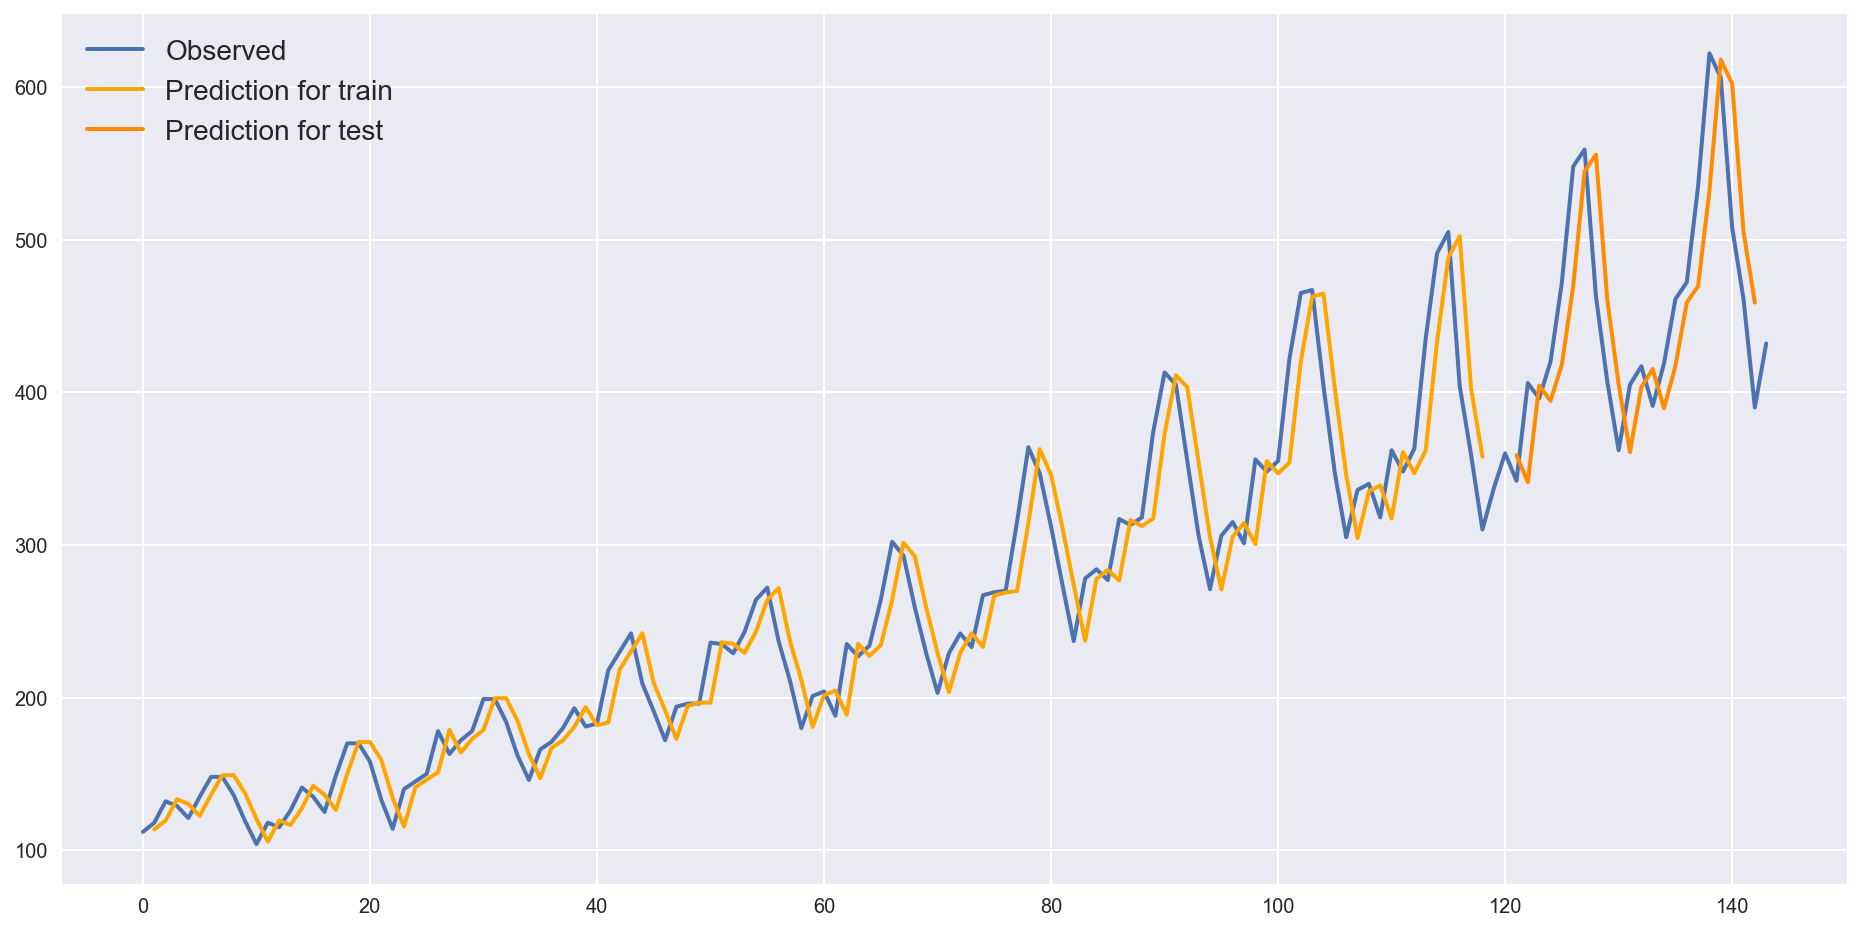

In [14]:
# generate predictions for training
train_predict = mdl.predict(X_train)
test_predict = mdl.predict(X_test)

# shift train predictions for plotting
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[lags: len(train_predict) + lags, :] = train_predict

# shift test predictions for plotting
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(lags*2)+1:len(data)-1, :] = test_predict

# plot baseline and predictions
plt.plot(data, label='Observed');
plt.plot(train_predict_plot, label='Prediction for train', color='orange');
plt.plot(test_predict_plot, label='Prediction for test', color='darkorange');
plt.legend(loc='best');
plt.show()

In [15]:
y_test

array([ 342.,  406.,  396.,  420.,  472.,  548.,  559.,  463.,  407.,
        362.,  405.,  417.,  391.,  419.,  461.,  472.,  535.,  622.,
        606.,  508.,  461.,  390.], dtype=float32)

In [16]:
test_predict

array([[ 358.80505],
       [ 341.00314],
       [ 404.29883],
       [ 394.40887],
       [ 418.14478],
       [ 469.57251],
       [ 544.73615],
       [ 555.61511],
       [ 460.67154],
       [ 405.28784],
       [ 360.78305],
       [ 403.30981],
       [ 415.1778 ],
       [ 389.4639 ],
       [ 417.15576],
       [ 458.69357],
       [ 469.57251],
       [ 531.87921],
       [ 617.92181],
       [ 602.09784],
       [ 505.17633],
       [ 458.69357]], dtype=float32)

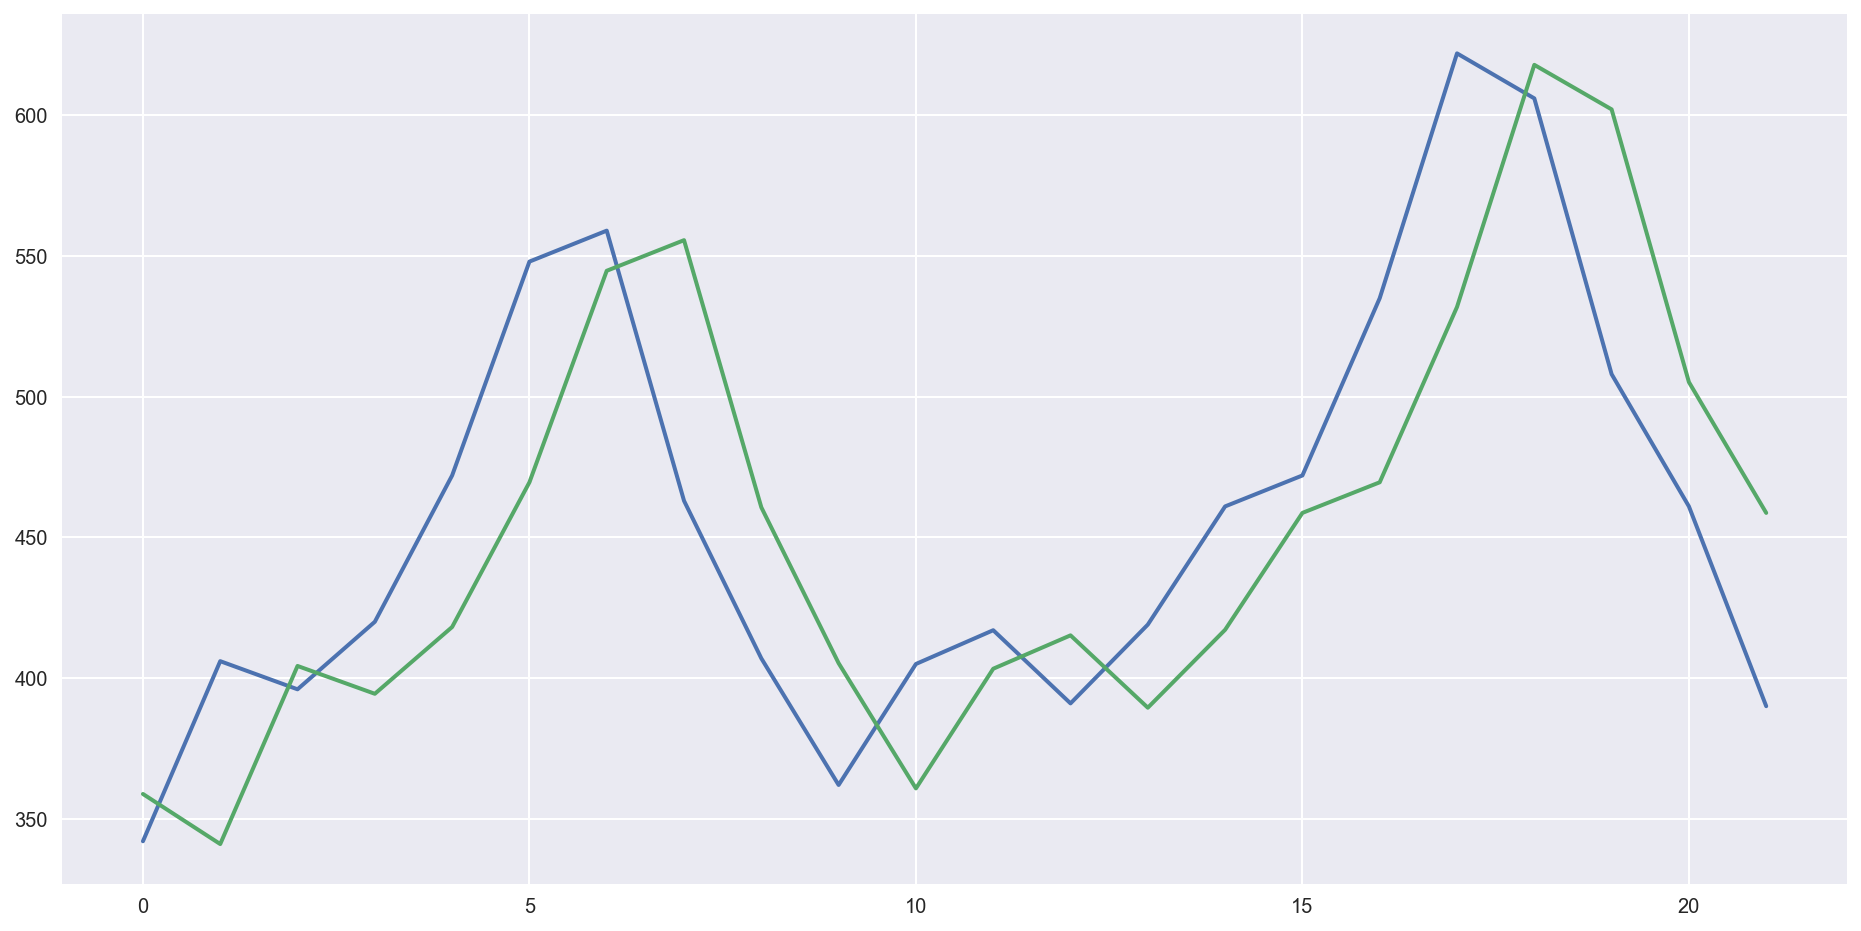

In [17]:
plt.plot(y_test)
plt.plot(test_predict)
plt.show()

In [18]:
mse = ((y_test - test_predict) ** 2).mean()
print(mse)
print(math.sqrt(mse))

11411.3
106.82389585931838


Since the neural network has only been fed by the last observation, it did not have much choice but to learn to apply observation $t$ for the prediction of $t+1$.

## Multilayer perceptron with window

In [19]:
# reshape dataset
lags = 3
X_train, y_train = prepare_data(train, lags)
X_test, y_test = prepare_data(test, lags)

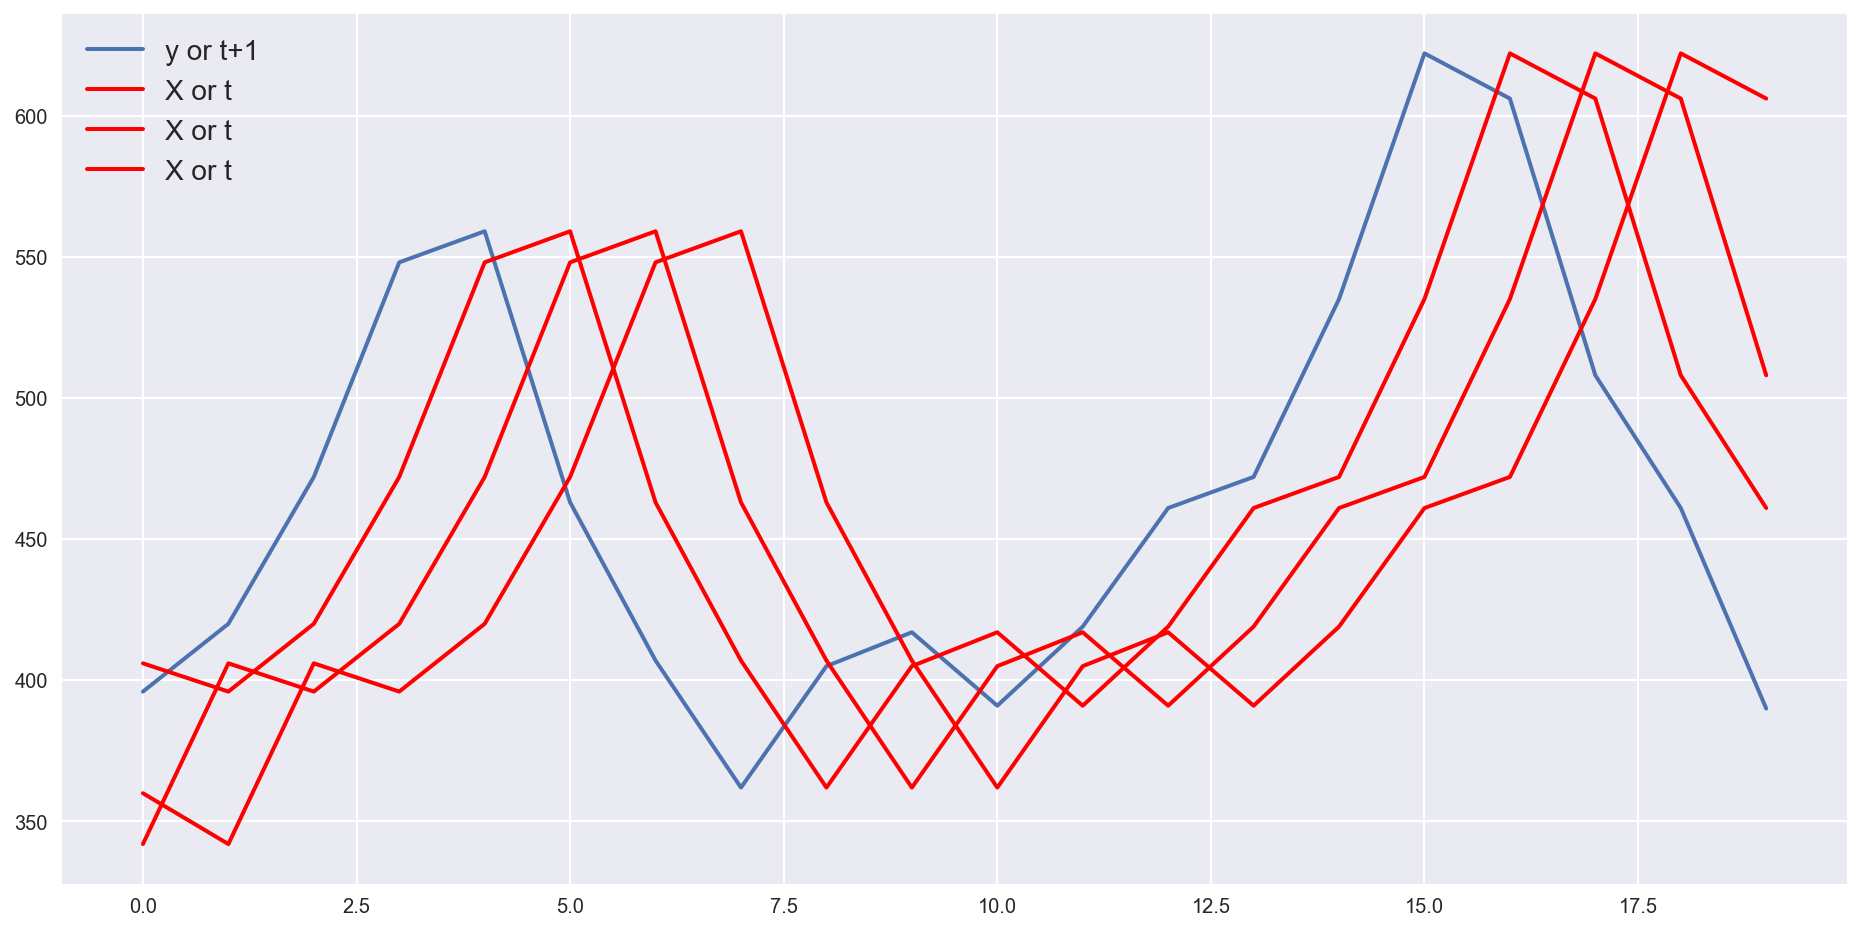

In [20]:
# plot the created data
plt.plot(y_test, label='y or t+1')
plt.plot(X_test, label='X or t', color='red')
plt.legend(loc='best')
plt.show()

In [21]:
# create and fit Multilayer Perceptron model
mdl = Sequential()
mdl.add(Dense(12, input_dim=lags, activation='relu'))
mdl.add(Dense(8, activation='relu'))
mdl.add(Dense(1))
mdl.compile(loss='mean_squared_error', optimizer='adam')
mdl.fit(X_train, y_train, epochs=400, batch_size=2, verbose=2)

Epoch 1/400
0s - loss: 3649.6062
Epoch 2/400
0s - loss: 1846.9335
Epoch 3/400
0s - loss: 1722.7140
Epoch 4/400
0s - loss: 1600.7007
Epoch 5/400
0s - loss: 1520.6737
Epoch 6/400
0s - loss: 1324.8929
Epoch 7/400
0s - loss: 1266.9564
Epoch 8/400
0s - loss: 1246.9824
Epoch 9/400
0s - loss: 1125.4438
Epoch 10/400
0s - loss: 1161.3989
Epoch 11/400
0s - loss: 1080.3316
Epoch 12/400
0s - loss: 1067.9429
Epoch 13/400
0s - loss: 983.8140
Epoch 14/400
0s - loss: 937.8197
Epoch 15/400
0s - loss: 904.5400
Epoch 16/400
0s - loss: 873.6346
Epoch 17/400
0s - loss: 870.6394
Epoch 18/400
0s - loss: 940.0197
Epoch 19/400
0s - loss: 892.2624
Epoch 20/400
0s - loss: 826.9060
Epoch 21/400
0s - loss: 771.7948
Epoch 22/400
0s - loss: 855.5934
Epoch 23/400
0s - loss: 813.8043
Epoch 24/400
0s - loss: 811.7401
Epoch 25/400
0s - loss: 781.0094
Epoch 26/400
0s - loss: 770.7810
Epoch 27/400
0s - loss: 809.4967
Epoch 28/400
0s - loss: 756.3783
Epoch 29/400
0s - loss: 798.0753
Epoch 30/400
0s - loss: 770.4001
Epoch 3

0s - loss: 819.8678
Epoch 249/400
0s - loss: 784.3431
Epoch 250/400
0s - loss: 726.9876
Epoch 251/400
0s - loss: 769.2440
Epoch 252/400
0s - loss: 752.8277
Epoch 253/400
0s - loss: 767.2727
Epoch 254/400
0s - loss: 707.7753
Epoch 255/400
0s - loss: 857.9349
Epoch 256/400
0s - loss: 759.8010
Epoch 257/400
0s - loss: 749.3056
Epoch 258/400
0s - loss: 740.3396
Epoch 259/400
0s - loss: 766.7450
Epoch 260/400
0s - loss: 775.0755
Epoch 261/400
0s - loss: 763.1528
Epoch 262/400
0s - loss: 731.4044
Epoch 263/400
0s - loss: 800.5262
Epoch 264/400
0s - loss: 739.8810
Epoch 265/400
0s - loss: 799.8784
Epoch 266/400
0s - loss: 724.4970
Epoch 267/400
0s - loss: 762.7808
Epoch 268/400
0s - loss: 743.3614
Epoch 269/400
0s - loss: 735.7584
Epoch 270/400
0s - loss: 751.1828
Epoch 271/400
0s - loss: 767.0720
Epoch 272/400
0s - loss: 733.0656
Epoch 273/400
0s - loss: 769.2680
Epoch 274/400
0s - loss: 777.1996
Epoch 275/400
0s - loss: 786.8051
Epoch 276/400
0s - loss: 787.7263
Epoch 277/400
0s - loss: 754

In [22]:
# Estimate model performance
train_score = mdl.evaluate(X_train, y_train, verbose=0)
print('Train Score: {:.2f} MSE ({:.2f} RMSE)'.format(train_score, math.sqrt(train_score)))
test_score = mdl.evaluate(X_test, y_test, verbose=0)
print('Test Score: {:.2f} MSE ({:.2f} RMSE)'.format(test_score, math.sqrt(test_score)))

Train Score: 701.22 MSE (26.48 RMSE)
Test Score: 2195.51 MSE (46.86 RMSE)


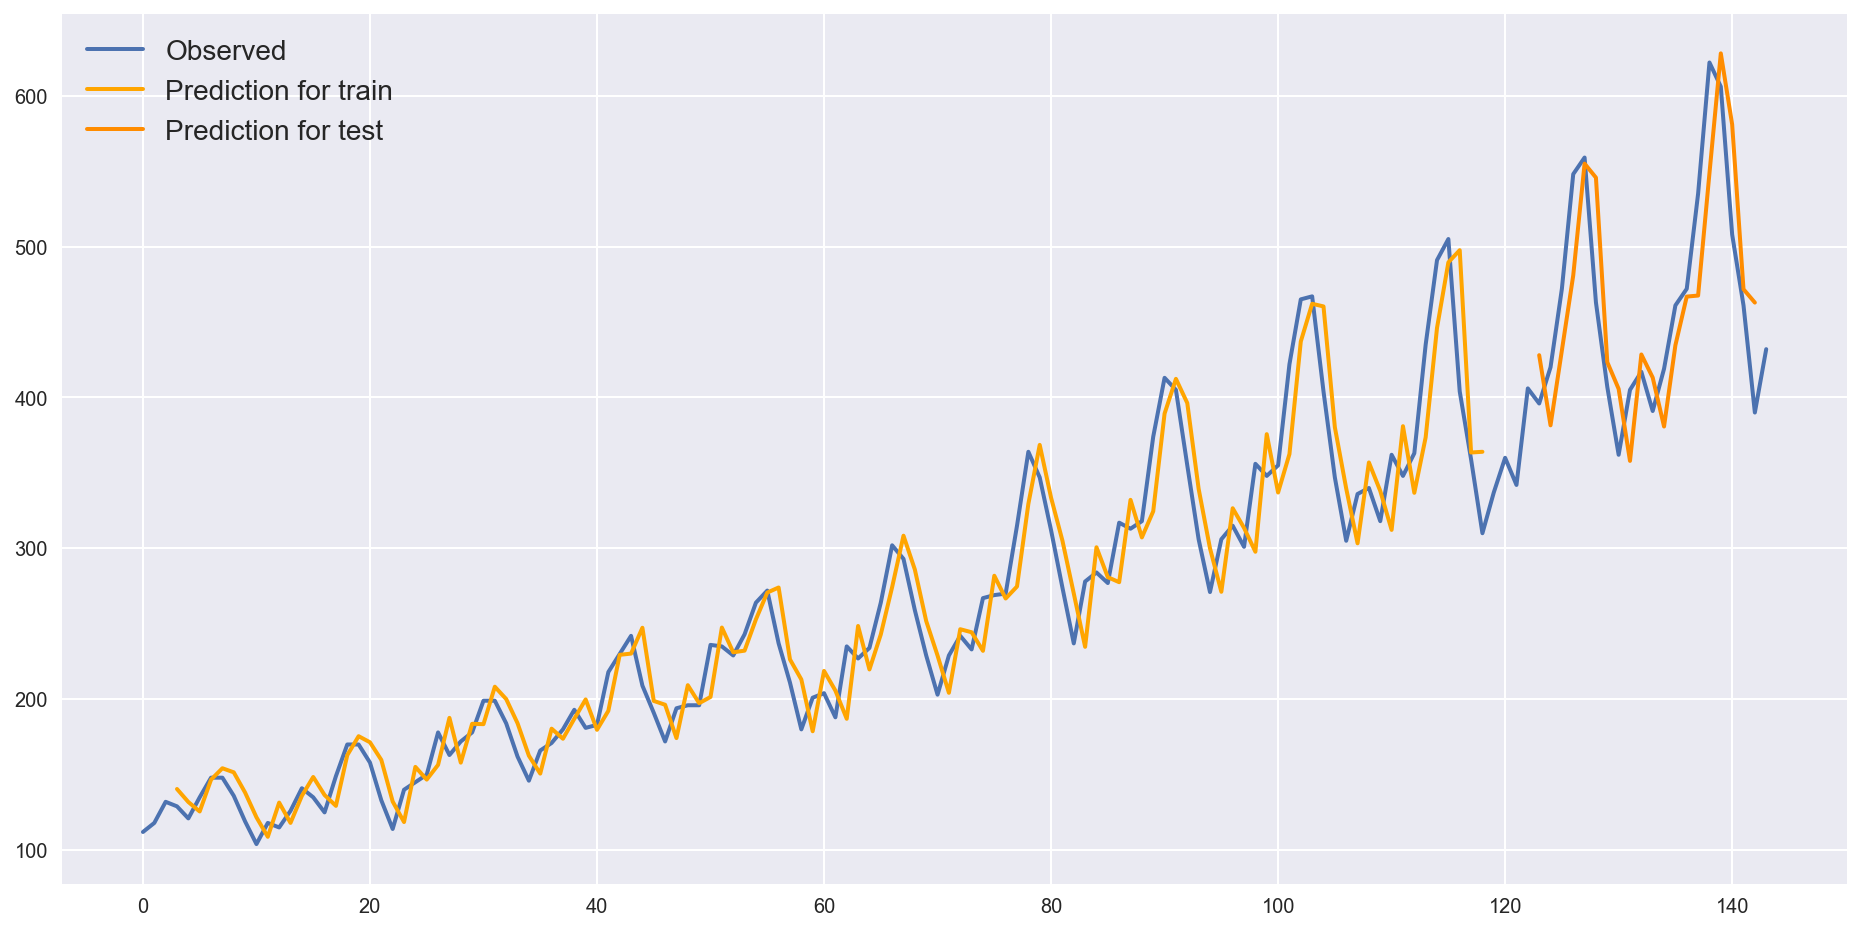

In [23]:
# generate predictions for training
train_predict = mdl.predict(X_train)
test_predict = mdl.predict(X_test)

# shift train predictions for plotting
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[lags: len(train_predict) + lags, :] = train_predict

# shift test predictions for plotting
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(lags * 2)+1:len(data)-1, :] = test_predict

# plot observation and predictions
plt.plot(data, label='Observed');
plt.plot(train_predict_plot, label='Prediction for train', color='orange');
plt.plot(test_predict_plot, label='Prediction for test', color='darkorange');
plt.legend(loc='best');
plt.show()

In [24]:
mse = ((y_test - test_predict) ** 2).mean()
print(mse)
print(math.sqrt(mse))

10359.7
101.78264122475649


In [25]:
y_test

array([ 396.,  420.,  472.,  548.,  559.,  463.,  407.,  362.,  405.,
        417.,  391.,  419.,  461.,  472.,  535.,  622.,  606.,  508.,
        461.,  390.], dtype=float32)

In [58]:
# return linear least-squares solution to linear matrix equation
# [0] - least square solution (betas)
# [1] = residuals
reg = np.linalg.lstsq(data[cols].values, np.sign(data['changes'].values))[0]

# display the beta coefficients
reg

In [60]:
# compute prediction
pred = np.sign(np.dot(data[cols].values, reg))

pred

array([-1., -1.,  1.,  1., -1., -1., -1.,  1.,  1., -1.,  1.,  1., -1.,
       -1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.,  1., -1., -1.,
        1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.,
       -1., -1., -1., -1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1.,
       -1., -1., -1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1., -1.,
       -1., -1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1., -1., -1.,
       -1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1., -1., -1., -1., -1.,
        1.,  1.,  1., -1.,  1., -1., -1.,  1., -1., -1., -1., -1.,  1.,
        1.,  1., -1.,  1., -1., -1.,  1., -1., -1., -1.,  1.,  1.,  1.,
        1., -1.,  1., -1., -1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1.,
       -1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1.])

# LSTM Recurrent Neural Network

In [53]:
# fix random seed for reproducibility
np.random.seed(1)

# load the dataset
df = pd.read_csv('./data/passengers.csv', sep=';', parse_dates=True, index_col=0)
data = df.values
data = data.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data)

# split into train and test sets
train = dataset[0:120, :]
test = dataset[120:, :]

# reshape into X=t and Y=t+1
lags = 3
X_train, y_train = prepare_data(train, lags)
X_test, y_test = prepare_data(test, lags)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [54]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, lags)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
1s - loss: 0.0615
Epoch 2/100
0s - loss: 0.0239
Epoch 3/100
0s - loss: 0.0172
Epoch 4/100
0s - loss: 0.0145
Epoch 5/100
0s - loss: 0.0123
Epoch 6/100
0s - loss: 0.0107
Epoch 7/100
0s - loss: 0.0092
Epoch 8/100
0s - loss: 0.0082
Epoch 9/100
0s - loss: 0.0076
Epoch 10/100
0s - loss: 0.0071
Epoch 11/100
0s - loss: 0.0069
Epoch 12/100
0s - loss: 0.0068
Epoch 13/100
0s - loss: 0.0064
Epoch 14/100
0s - loss: 0.0064
Epoch 15/100
0s - loss: 0.0061
Epoch 16/100
0s - loss: 0.0060
Epoch 17/100
0s - loss: 0.0059
Epoch 18/100
0s - loss: 0.0060
Epoch 19/100
0s - loss: 0.0058
Epoch 20/100
0s - loss: 0.0057
Epoch 21/100
0s - loss: 0.0056
Epoch 22/100
0s - loss: 0.0054
Epoch 23/100
0s - loss: 0.0054
Epoch 24/100
0s - loss: 0.0054
Epoch 25/100
0s - loss: 0.0053
Epoch 26/100
0s - loss: 0.0052
Epoch 27/100
0s - loss: 0.0051
Epoch 28/100
0s - loss: 0.0051
Epoch 29/100
0s - loss: 0.0050
Epoch 30/100
0s - loss: 0.0050
Epoch 31/100
0s - loss: 0.0047
Epoch 32/100
0s - loss: 0.0046
Epoch 33/100
0s -

In [55]:
# make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [56]:
# invert transformation
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

In [57]:
# calculate root mean squared error
train_score = math.sqrt(mean_squared_error(y_train[0], train_predict[:,0]))
print('Train Score: {:.2f} RMSE'.format(train_score))
test_score = math.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
print('Test Score: {:.2f} RMSE'.format(test_score))

Train Score: 25.83 RMSE
Test Score: 63.67 RMSE


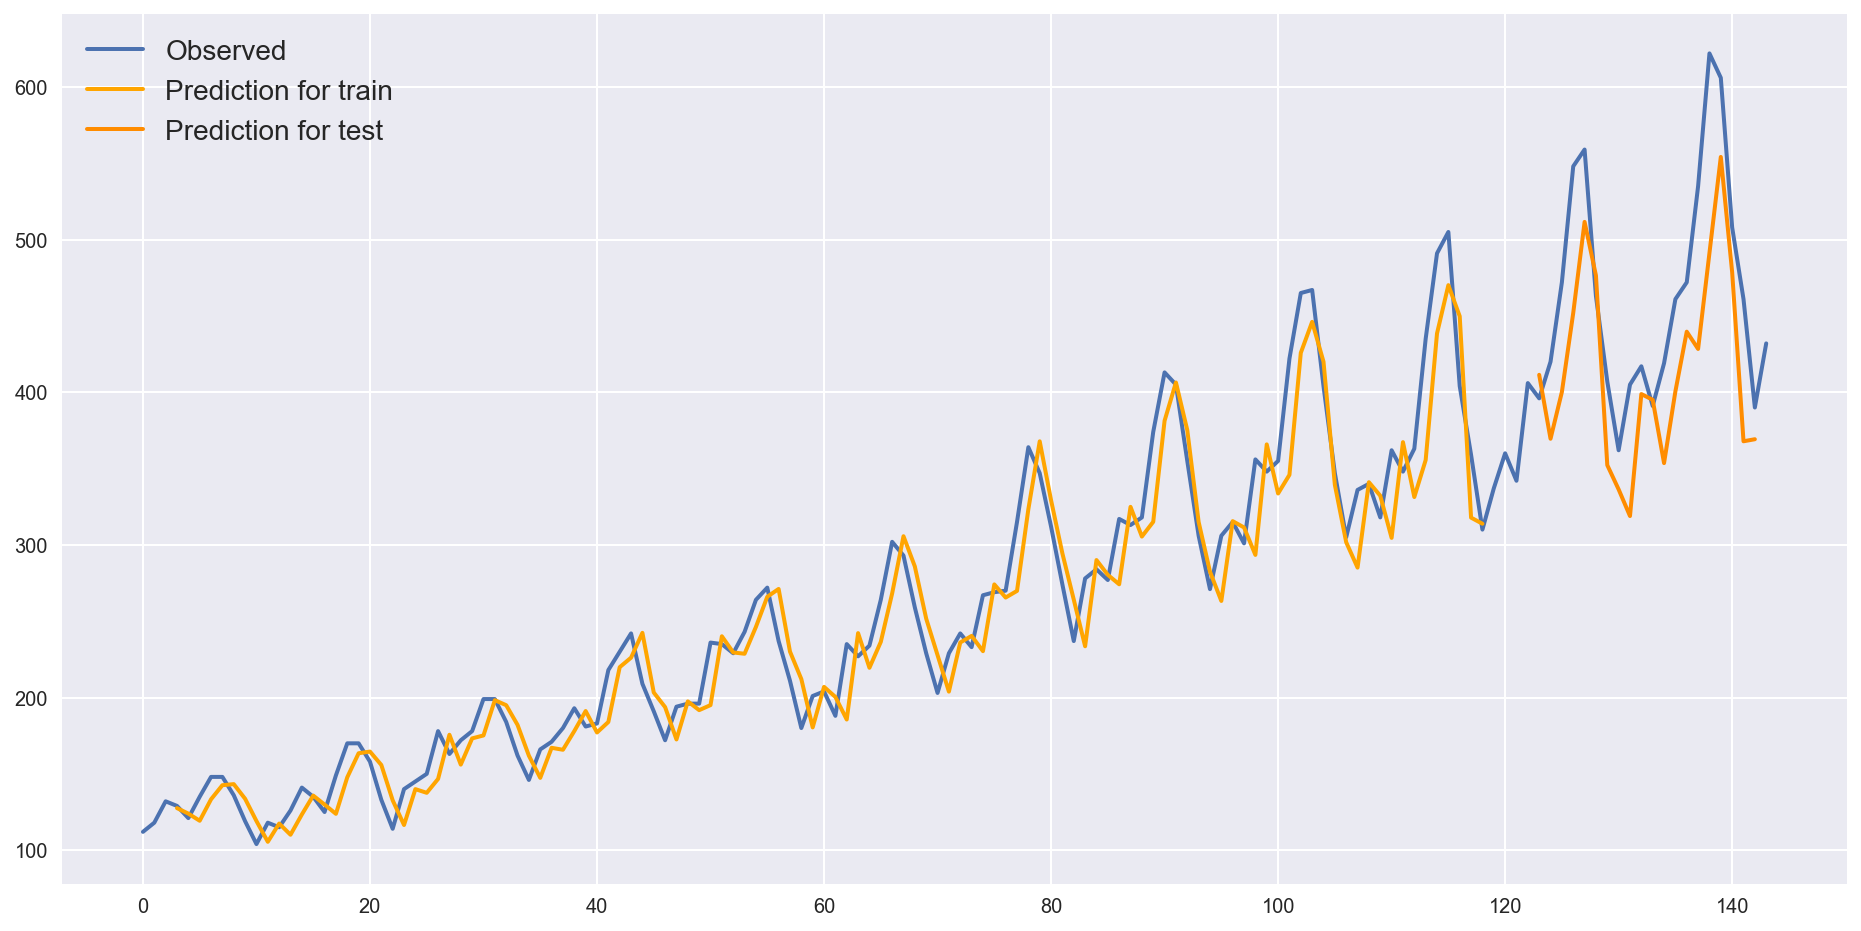

In [58]:
# shift train predictions for plotting
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[lags:len(train_predict)+lags, :] = train_predict

# shift test predictions for plotting
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (lags * 2)+1:len(data)-1, :] = test_predict

# plot observation and predictions
plt.plot(data, label='Observed');
plt.plot(train_predict_plot, label='Prediction for train', color='orange');
plt.plot(test_predict_plot, label='Prediction for test', color='darkorange');
plt.legend(loc='best');
plt.show()

In [59]:
mse = ((y_test - test_predict) ** 2).mean()
print(mse)
print(math.sqrt(mse))

11647.3222988
107.92276080044431
